# Apartment sale advertisements research 

We have at our disposal Yandex.Realty service data - an sale ads archive for the apartments in St. Petersburg and neighboring settlements for several years. We need to learn how to determine the real estate market value. Our task is to set the parameters. This will allow to build an automated system: it will track anomalies and fraudulent activity.

Two types of data are available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically on the basis of cartographic data. For example, the distance to the center, airport, nearest park and pond.

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-to-data" data-toc-modified-id="Introduction-to-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction to data</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Deleting-columns" data-toc-modified-id="Deleting-columns-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Deleting columns</a></span></li><li><span><a href="#Gaps" data-toc-modified-id="Gaps-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Gaps</a></span></li><li><span><a href="#Changing-the-data-types" data-toc-modified-id="Changing-the-data-types-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Changing the data types</a></span></li><li><span><a href="#Duplicates" data-toc-modified-id="Duplicates-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Duplicates</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Adding-data" data-toc-modified-id="Adding-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Adding data</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory data analysis</a></span><ul class="toc-item"><li><span><a href="#Statistical-outliers-processing" data-toc-modified-id="Statistical-outliers-processing-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Statistical outliers processing</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Indicators-research" data-toc-modified-id="Indicators-research-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Indicators research</a></span><ul class="toc-item"><li><span><a href="#Price" data-toc-modified-id="Price-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Price</a></span></li><li><span><a href="#Area" data-toc-modified-id="Area-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Area</a></span></li><li><span><a href="#Rooms" data-toc-modified-id="Rooms-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Rooms</a></span></li><li><span><a href="#Ceiling-height" data-toc-modified-id="Ceiling-height-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Ceiling height</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#The-study-of-price-influencing-factors" data-toc-modified-id="The-study-of-price-influencing-factors-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>The study of price influencing factors</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Top-10-cities-research" data-toc-modified-id="Top-10-cities-research-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Top-10 cities research</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#St.-Petersburg-city-center-research" data-toc-modified-id="St.-Petersburg-city-center-research-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>St. Petersburg city center research</a></span><ul class="toc-item"><li><span><a href="#Data-Sample" data-toc-modified-id="Data-Sample-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Data Sample</a></span></li><li><span><a href="#Parameters-research" data-toc-modified-id="Parameters-research-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>Parameters research</a></span></li><li><span><a href="#Factors-research" data-toc-modified-id="Factors-research-4.5.3"><span class="toc-item-num">4.5.3&nbsp;&nbsp;</span>Factors research</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4.5.4"><span class="toc-item-num">4.5.4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></li><li><span><a href="#Research-results" data-toc-modified-id="Research-results-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Research results</a></span></li></ul></div>

## Introduction to data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('real_estate_data_en.csv')

In [3]:
display(df.head(5))
df.info(memory_usage = 'deep')
df.describe().T

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Sankt-Peterburg,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,Shushary setlement,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Sankt-Peterburg,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Sankt-Peterburg,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Sankt-Peterburg,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


In [4]:
print('Locality_name data')
print(df['locality_name'].value_counts())

Locality_name data
Sankt-Peterburg              15721
Murino setlement               522
Shushary setlement             440
Vsevolozhsk                    398
Pushkin                        369
                             ...  
Pel'gora village                 1
Kalozhitsy settlement            1
Platforma settlement 69km        1
Pochap settlement                1
Dzerzhinskogo setlement          1
Name: locality_name, Length: 360, dtype: int64


### Conclusion

- There are many columns in the df that are not required for the reserch, optimization is needed
- Requires data type changes, at least for `first_day_exposition` column
- There are many gaps in different columns, data needs to be processed
- The maximum and minimum values in many columns look like an anomaly
- More than half of the apartments in the df are located directly in St. Petersburg

## Data preprocessing

### Deleting columns

The table has 22 columns. According to the terms of reference, we need to explore the relationships in the following data:
- Area `total_area` `living_area` `kitchen_area` may also need `studio`
- Price `last_price`
- Number of rooms`rooms`
- Ceiling height `ceiling_height`
- Ad placement date `first_day_exposition`
- Apartment sale time `days_exposition`
- Distance from the center `cityCenters_nearest`
- Floor `floor` `floors_total`
- Location `locality_name`

It's 13 columns. The rest 9 do not need to be analyzed, which means that they can be deleted

In [5]:
df = df.drop(columns = [
    'total_images', 
    'is_apartment', 
    'open_plan', 
    'balcony', 
    'airports_nearest', 
    'parks_around3000', 
    'parks_nearest', 
    'ponds_around3000',
    'ponds_nearest'
])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            23699 non-null  float64
 1   total_area            23699 non-null  float64
 2   first_day_exposition  23699 non-null  object 
 3   rooms                 23699 non-null  int64  
 4   ceiling_height        14504 non-null  float64
 5   floors_total          23613 non-null  float64
 6   living_area           21796 non-null  float64
 7   floor                 23699 non-null  int64  
 8   studio                23699 non-null  bool   
 9   kitchen_area          21421 non-null  float64
 10  locality_name         23650 non-null  object 
 11  cityCenters_nearest   18180 non-null  float64
 12  days_exposition       20518 non-null  float64
dtypes: bool(1), float64(8), int64(2), object(2)
memory usage: 2.2+ MB


### Gaps

Gaps are present in the following columns:
- `ceiling_height` 38% data
- `floors_total` <1% of data
- `living_area` 8% data
- `kitchen_area` 10% data
- `locality_name` <1% of data
- `cityCenters_nearest` 23% data
- `days_exposition` 13% of data

Let's get rid of the gaps that will not affect the quality of the reserch due to their small number.

In [6]:
df = df.dropna(subset = ['floors_total', 'locality_name']).reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            23565 non-null  float64
 1   total_area            23565 non-null  float64
 2   first_day_exposition  23565 non-null  object 
 3   rooms                 23565 non-null  int64  
 4   ceiling_height        14481 non-null  float64
 5   floors_total          23565 non-null  float64
 6   living_area           21700 non-null  float64
 7   floor                 23565 non-null  int64  
 8   studio                23565 non-null  bool   
 9   kitchen_area          21343 non-null  float64
 10  locality_name         23565 non-null  object 
 11  cityCenters_nearest   18064 non-null  float64
 12  days_exposition       20394 non-null  float64
dtypes: bool(1), float64(8), int64(2), object(2)
memory usage: 2.2+ MB


The None value in the `days_exposition` clumn could potentially mean that the apartment has not yet been sold at the time the statistics were collected. Let's examine the data slice, paying particular attention to the `first_day_exposition` column

In [7]:
df[df['days_exposition'].isna()].sample(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,cityCenters_nearest,days_exposition
16206,3700000.0,57.3,2019-03-20T00:00:00,2,NaN,8.0,30.0,8,False,8.40,Vsevolozhsk,NaN,NaN
6094,4897000.0,42.0,2019-03-14T00:00:00,1,2.70,26.0,18.0,11,False,12.00,Pargolovo setlement,19070.0,NaN
5395,2800000.0,60.8,2018-10-04T00:00:00,2,2.60,6.0,35.0,6,False,11.10,Sosnovo setlement,NaN,NaN
15081,2550000.0,29.7,2019-04-12T00:00:00,1,NaN,7.0,17.0,5,False,6.00,Vyborg,NaN,NaN
20108,3950000.0,35.0,2019-04-14T00:00:00,1,2.65,12.0,16.0,2,False,11.00,Sankt-Peterburg,14772.0,NaN
23540,5950000.0,56.0,2019-03-05T00:00:00,3,NaN,8.0,32.1,3,False,8.50,Sankt-Peterburg,9217.0,NaN
21681,4700000.0,42.0,2019-04-28T00:00:00,2,2.60,5.0,26.0,5,False,7.00,Sankt-Peterburg,8922.0,NaN
3825,4800000.0,56.3,2017-10-23T00:00:00,3,2.55,9.0,39.5,9,False,6.20,Sankt-Peterburg,15643.0,NaN
8491,22743212.0,134.0,2017-11-29T00:00:00,3,NaN,16.0,NaN,1,False,NaN,Sankt-Peterburg,6572.0,NaN
19688,12600000.0,78.4,2019-04-25T00:00:00,2,NaN,8.0,NaN,6,False,16.48,Sankt-Peterburg,11087.0,NaN


The hypothesis was not confirmed, the dates of the exposition are very different. To analyze this indicator, we will have to make a slice, but we should not delete all rows with empty `days_exposition` values, as this will greatly affect the other indicators reserch results. Let's leave the gaps as they are.

Gaps in `ceiling_height` column can be filled with average values, but this will greatly distort the statistics, since there are a very large number of them. It is better to focus on fewer but more reliable data when analyzing the impact of this value on the price. Decided to leave it as is.

The remaining columns are `living_area` and `kitchen_area`. There is a hypothesis that this data should have a high correlation with the `total_area` values, which will allow filling in the gaps with avg values.

In [8]:
df_la = df[~df['living_area'].isna()]
df_ka = df[~df['kitchen_area'].isna()]

print('Correlation between values living_area and total_area:', df_la['total_area'].corr(df_la['living_area']))
print('Correlation between values kitchen_area and total_area:', df_ka['total_area'].corr(df_la['kitchen_area']))

Correlation between values living_area and total_area: 0.9397711143610333
Correlation between values kitchen_area and total_area: 0.6095076959780383


The first hypothesis was confirmed, the correlation between the indicator of the total area and the living area is approaching 100%. We can find the average ratio of living area to total area and use this ratio to fill in the gaps.

In [9]:
df_la_coef = df_la['living_area'] / df_la['total_area']
df['living_area'] = df['living_area'].fillna(df_la_coef.mean() * df['total_area'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            23565 non-null  float64
 1   total_area            23565 non-null  float64
 2   first_day_exposition  23565 non-null  object 
 3   rooms                 23565 non-null  int64  
 4   ceiling_height        14481 non-null  float64
 5   floors_total          23565 non-null  float64
 6   living_area           23565 non-null  float64
 7   floor                 23565 non-null  int64  
 8   studio                23565 non-null  bool   
 9   kitchen_area          21343 non-null  float64
 10  locality_name         23565 non-null  object 
 11  cityCenters_nearest   18064 non-null  float64
 12  days_exposition       20394 non-null  float64
dtypes: bool(1), float64(8), int64(2), object(2)
memory usage: 2.2+ MB


Since there is no natural way to fill in the gaps in the `kitchen_area` column, and since this metric is not that important for the reserch, let's leave the data as it is.

### Changing the data types

In [10]:
df.info(memory_usage = 'deep')
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            23565 non-null  float64
 1   total_area            23565 non-null  float64
 2   first_day_exposition  23565 non-null  object 
 3   rooms                 23565 non-null  int64  
 4   ceiling_height        14481 non-null  float64
 5   floors_total          23565 non-null  float64
 6   living_area           23565 non-null  float64
 7   floor                 23565 non-null  int64  
 8   studio                23565 non-null  bool   
 9   kitchen_area          21343 non-null  float64
 10  locality_name         23565 non-null  object 
 11  cityCenters_nearest   18064 non-null  float64
 12  days_exposition       20394 non-null  float64
dtypes: bool(1), float64(8), int64(2), object(2)
memory usage: 5.1 MB


,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,cityCenters_nearest,days_exposition
23430,2500000.0,31.7,2018-08-14T00:00:00,1,2.70,6.0,14.5,1,False,10.1,Shushary setlement,23689.0,29.0
12112,12600000.0,128.0,2016-04-11T00:00:00,3,2.80,16.0,66.0,11,False,15.0,Sankt-Peterburg,8314.0,218.0
23465,4300000.0,33.4,2016-03-29T00:00:00,1,2.58,20.0,15.1,6,False,8.6,Sankt-Peterburg,14794.0,971.0
4524,3250000.0,32.0,2017-06-23T00:00:00,1,2.60,5.0,15.8,2,False,6.4,Sankt-Peterburg,12208.0,367.0
23319,4150000.0,46.6,2019-04-01T00:00:00,2,2.50,5.0,30.4,5,False,5.6,Sankt-Peterburg,12683.0,11.0
584,4500000.0,38.6,2018-01-17T00:00:00,1,2.70,17.0,20.0,15,False,10.6,Sankt-Peterburg,13554.0,322.0
19726,1950000.0,32.0,2016-05-26T00:00:00,1,NaN,5.0,18.0,2,False,6.0,Kirovsk,NaN,98.0
2264,4400000.0,59.6,2017-12-12T00:00:00,3,2.60,9.0,40.0,6,False,7.0,Sankt-Peterburg,13317.0,225.0
13215,4000000.0,36.1,2017-09-13T00:00:00,1,NaN,13.0,16.5,12,False,10.0,Sankt-Peterburg,9747.0,23.0
2887,3590000.0,35.9,2017-03-19T00:00:00,1,NaN,16.0,15.0,16,False,11.0,Sankt-Peterburg,11020.0,80.0


The data consumes a small amount of memory, optimization is not required. Obviously, we need to change the format of the `first_day_exposition` column to datetime format, leaving only the year, day, and month.

In [11]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
df.sample(5)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,cityCenters_nearest,days_exposition
18814,1200000.0,40.00,2017-12-19,2,2.5,3.0,22.597487,3,False,NaN,Podporozh'e,NaN,101.0
14931,39000000.0,293.60,2019-03-07,6,3.0,4.0,139.400000,4,False,21.0,Sankt-Peterburg,7799.0,30.0
7673,2596800.0,64.92,2016-05-12,2,NaN,12.0,28.900000,5,False,13.2,Kingisepp,NaN,45.0
7693,1500000.0,46.00,2018-01-16,2,2.6,2.0,25.987110,2,False,NaN,Mga urban settlement,NaN,45.0
22138,4500000.0,37.70,2017-04-24,1,2.7,24.0,17.000000,9,False,12.0,Sankt-Peterburg,13268.0,227.0


Also, to simplify visual perception, we will divide the `last_price` values by 1000, thus interrupting it into a price in thousand rubles.

In [12]:
df['last_price'] = df['last_price'] / 1000
df['last_price'].describe()

count     23565.000000
mean       6540.058260
std       10910.934722
min          12.190000
25%        3400.000000
50%        4646.000000
75%        6790.000000
max      763000.000000
Name: last_price, dtype: float64

### Duplicates

In [13]:
df[df.duplicated()]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,cityCenters_nearest,days_exposition


No duplicates found

### Conclusion

- Removed a number of columns that will not be needed in a future reserch
- Removed gaps in columns `floors_total` and `locality_name` due to their small number and impossibility to fill with logical values
- In the `days_exposition`, `kitchen_area` columns, the data is left as is, since in the first case, too large range of values would have to be deleted, and in the second case, the value chages will not greatly affect the reserch
- In the `cityCenters_nearest` column, the data is left as is, since there is a hypothesis that this data means the location of the apartment directly in the center. The hypothesis will be tested in the reserch
- Correlation found between `living_area` column with `total_are` column. The gaps are filled by the average value according to the living area to total ratio
- In the `total_price` column, the bit depth has been changed from units of rubles to thousands of rubles
- No duplicates found

## Adding data

Let's perform the tasks of calculating and adding to the table:
- Price per square meter `price_per_m2`
- Day `day`
- Month `month`
- Year `year`
- Ratio of living area to total `living_to_total`
- Ratio of kitchen area to total `kitchen_to_total`

In [14]:
df['price_per_m2'] = df['last_price'] / df['total_area']
df['price_per_m2'] = df['price_per_m2'].astype('int')
df['day'] = df['first_day_exposition'].dt.dayofweek
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df['living_to_total'] = df['living_area'] / df['total_area']
df['kitchen_to_total'] = df['kitchen_area'] / df['total_area']

df.sample(5)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_per_m2,day,month,year,living_to_total,kitchen_to_total
13886,3870.0,33.0,2017-02-14,1,NaN,24.0,14.5,15,False,9.5,Sankt-Peterburg,13783.0,32.0,117,1,2,2017,0.439394,0.287879
22425,4500.0,73.7,2018-01-20,3,2.50,9.0,43.4,9,False,8.3,Otradnoe,NaN,383.0,61,5,1,2018,0.588874,0.112619
5672,5100.0,66.0,2018-12-18,3,2.50,9.0,47.0,1,False,6.2,Sankt-Peterburg,14950.0,84.0,77,1,12,2018,0.712121,0.093939
14216,5000.0,73.0,2018-10-18,3,2.55,10.0,43.5,1,False,8.6,Murino setlement,NaN,5.0,68,3,10,2018,0.595890,0.117808
6007,3650.0,34.5,2018-03-06,1,2.75,25.0,16.0,19,False,9.5,Sankt-Peterburg,16414.0,10.0,105,1,3,2018,0.463768,0.275362


Let's perform the task of categorizing of the apartment floor location values in the `floor_type` column, applying the following categories:
- Ground floor, if the floor is equal to one
- Last floor if the floor is equal to the total number of floors
- Other on other occasions
- Unknown, in case of zeros

In [15]:
df.loc[df['floor'] == 1, 'floor_type'] = 'Ground floor'
df.loc[df['floor'] == df['floors_total'], 'floor_type'] = 'Last floor'
df.loc[df['floor'] == 0, 'floor_type'] = 'Unknown'
df['floor_type'] = df['floor_type'].fillna('Other')
df.sample(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_per_m2,day,month,year,living_to_total,kitchen_to_total,floor_type
50,4500.0,48.2,2017-11-13,1,2.70,5.0,25.4,4,False,9.0,Pushkin,30183.0,152.0,93,0,11,2017,0.526971,0.186722,Other
17715,4225.0,38.4,2017-09-08,1,NaN,19.0,17.7,7,False,11.2,Sankt-Peterburg,15144.0,39.0,110,4,9,2017,0.460938,0.291667,Other
23432,2990.0,32.0,2017-11-09,1,NaN,9.0,18.0,7,False,6.5,Sankt-Peterburg,15955.0,11.0,93,3,11,2017,0.562500,0.203125,Other
11727,6550.0,57.4,2018-07-29,2,2.70,12.0,33.2,8,False,9.4,Sankt-Peterburg,15470.0,41.0,114,6,7,2018,0.578397,0.163763,Other
9332,6900.0,53.8,2018-09-25,2,2.76,15.0,30.3,1,False,9.8,Sankt-Peterburg,13239.0,169.0,128,1,9,2018,0.563197,0.182156,Ground floor
8850,3000.0,40.1,2018-07-17,1,NaN,10.0,17.2,7,False,8.3,Murino setlement,NaN,162.0,74,1,7,2018,0.428928,0.206983,Other
17511,2800.0,32.0,2016-06-28,1,NaN,5.0,18.0,2,False,6.0,Sankt-Peterburg,14385.0,44.0,87,1,6,2016,0.562500,0.187500,Other
11022,5400.0,61.6,2018-01-11,2,3.05,4.0,32.8,1,False,8.4,Sankt-Peterburg,11277.0,NaN,87,3,1,2018,0.532468,0.136364,Ground floor
23029,4350.0,44.9,2017-08-10,1,NaN,16.0,19.3,5,False,12.6,Sankt-Peterburg,15294.0,128.0,96,3,8,2017,0.429844,0.280624,Other
9467,3700.0,42.0,2018-12-07,1,2.60,5.0,17.0,2,False,12.0,Murino,NaN,NaN,88,4,12,2018,0.404762,0.285714,Other


### Conclusion

The following columns have been added:
- `price_per_m2` - price per square meter, calculated as price divided by total area
- `day` - day of the week
- `month` - month
- `year` - year
- `living_to_total` - share of living space in total, calculated as the living space to total ratio
- `kitchen_to_total` - the share of the kitchen area in the total, calculated as the kitchen area to total ratio
- `floor_type` - floor category, ground, last, other, unknown

## Exploratory data analysis

### Statistical outliers processing

Let's look at the plot of the apartment price data distribution

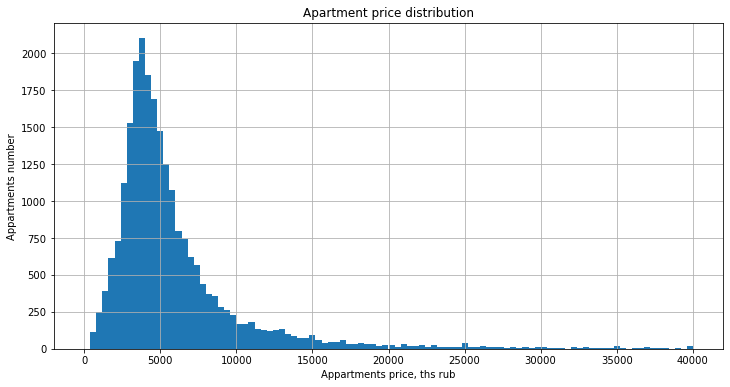

count     23565.000000
mean       6540.058260
std       10910.934722
min          12.190000
25%        3400.000000
50%        4646.000000
75%        6790.000000
max      763000.000000
Name: last_price, dtype: float64

In [16]:
lp_hist = df['last_price'].hist(range = (0, 40000), bins = 100, figsize = (12, 6))
lp_hist.set_title('Apartment price distribution')
lp_hist.set_ylabel('Appartments number')
lp_hist.set_xlabel('Appartments price, ths rub')
plt.show()
df['last_price'].describe()

The median value of 4.6 million is very different from the average of 6.5 million. There is clearly a market inequality, as well as errors and statistical outliers. The minimum price of an apartment of 12,190 rubles is suspicious. We should take a closer look at the lowest values of the price

In [17]:
df.query('last_price < 500')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_per_m2,day,month,year,living_to_total,kitchen_to_total,floor_type
5670,450.00,42.0,2017-07-31,2,NaN,1.0,23.000000,1,False,5.8,Budogosch' urban settlement,NaN,233.0,10,0,7,2017,0.547619,0.138095,Last floor
6824,490.00,40.0,2017-12-11,1,NaN,5.0,22.597487,3,False,NaN,Staropol'e village,NaN,43.0,12,0,12,2017,0.564937,NaN,Other
8750,12.19,109.0,2019-03-20,2,2.75,25.0,32.000000,25,False,40.5,Sankt-Peterburg,9176.0,8.0,0,2,3,2019,0.293578,0.371560,Last floor
9535,450.00,43.4,2018-08-31,2,NaN,5.0,30.300000,3,False,5.5,Staropol'e village,NaN,96.0,10,4,8,2018,0.698157,0.126728,Other
10722,490.00,29.1,2016-05-05,1,2.50,5.0,17.000000,5,False,5.5,Slantsy,NaN,719.0,16,3,5,2016,0.584192,0.189003,Last floor
14825,430.00,54.0,2018-06-26,2,NaN,3.0,30.506607,3,False,NaN,settlement station Svir',NaN,44.0,7,1,6,2018,0.564937,NaN,Last floor
15943,480.00,32.0,2019-01-06,1,NaN,2.0,16.000000,1,False,NaN,Slantsy,NaN,83.0,15,6,1,2019,0.500000,NaN,Ground floor
16130,450.00,38.5,2018-07-11,2,2.65,2.0,21.750081,1,False,NaN,Vahnova Kara village,NaN,45.0,11,2,7,2018,0.564937,NaN,Ground floor
16185,440.00,40.0,2018-07-10,1,NaN,5.0,22.597487,1,False,NaN,Staropol'e village,NaN,45.0,11,1,7,2018,0.564937,NaN,Ground floor
17359,430.00,30.4,2019-04-22,1,NaN,2.0,16.000000,1,False,6.0,Slantsy,NaN,NaN,14,0,4,2019,0.526316,0.197368,Ground floor


Small apartments or private houses may cost less than 500,000 but a 100-square-meter apartment in St. Petersburg certainly cannot cost 12,000. This may be a mistake and it is meant 12 million not 12 thousand, but it is easier to delete the row, especially since it is only one.

In [18]:
df = df.query('last_price > 100')
df.query('last_price < 500')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_per_m2,day,month,year,living_to_total,kitchen_to_total,floor_type
5670,450.0,42.0,2017-07-31,2,NaN,1.0,23.000000,1,False,5.8,Budogosch' urban settlement,NaN,233.0,10,0,7,2017,0.547619,0.138095,Last floor
6824,490.0,40.0,2017-12-11,1,NaN,5.0,22.597487,3,False,NaN,Staropol'e village,NaN,43.0,12,0,12,2017,0.564937,NaN,Other
9535,450.0,43.4,2018-08-31,2,NaN,5.0,30.300000,3,False,5.5,Staropol'e village,NaN,96.0,10,4,8,2018,0.698157,0.126728,Other
10722,490.0,29.1,2016-05-05,1,2.50,5.0,17.000000,5,False,5.5,Slantsy,NaN,719.0,16,3,5,2016,0.584192,0.189003,Last floor
14825,430.0,54.0,2018-06-26,2,NaN,3.0,30.506607,3,False,NaN,settlement station Svir',NaN,44.0,7,1,6,2018,0.564937,NaN,Last floor
15943,480.0,32.0,2019-01-06,1,NaN,2.0,16.000000,1,False,NaN,Slantsy,NaN,83.0,15,6,1,2019,0.500000,NaN,Ground floor
16130,450.0,38.5,2018-07-11,2,2.65,2.0,21.750081,1,False,NaN,Vahnova Kara village,NaN,45.0,11,2,7,2018,0.564937,NaN,Ground floor
16185,440.0,40.0,2018-07-10,1,NaN,5.0,22.597487,1,False,NaN,Staropol'e village,NaN,45.0,11,1,7,2018,0.564937,NaN,Ground floor
17359,430.0,30.4,2019-04-22,1,NaN,2.0,16.000000,1,False,6.0,Slantsy,NaN,NaN,14,0,4,2019,0.526316,0.197368,Ground floor
17577,450.0,36.5,2018-02-01,1,NaN,5.0,17.300000,4,False,8.5,Jam-Tesovo village,NaN,120.0,12,3,2,2018,0.473973,0.232877,Other


Apartments in the upper price range of more than 40 million rubles are strongly out of the general statistics, it is best to get rid of them, since our goal is to conduct a reserch of the market price, and it is better to look at the relationship between prices and other values on stable data. Let's see how many apartments we have worth more than 40 million rubles.

In [19]:
df.query('last_price > 40000')['last_price'].describe()

count       181.000000
mean      88078.912442
std       77968.870845
min       40488.000000
25%       50000.000000
50%       65000.000000
75%       90000.000000
max      763000.000000
Name: last_price, dtype: float64

Only 181 lines, and the data range is from 88 to 763 million. The average is almost one and a half times higher than the median. Let's get rid of them

In [20]:
df = df.query('last_price < 40000')
df['last_price'].describe()

count    23371.000000
mean      5891.668202
std       4552.344004
min        430.000000
25%       3400.000000
50%       4600.000000
75%       6700.000000
max      39990.000000
Name: last_price, dtype: float64

Now let's look at the `total_area`

count    23371.000000
mean        58.849532
std         29.902995
min         12.000000
25%         40.000000
50%         51.900000
75%         69.000000
max        470.300000
Name: total_area, dtype: float64


array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

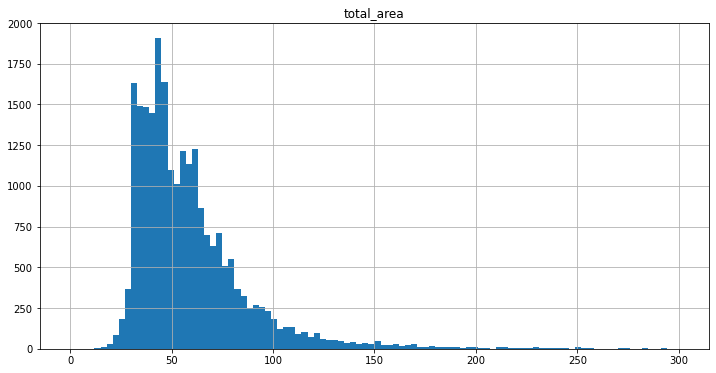

In [21]:
print(df['total_area'].describe())
df.hist('total_area',range = (0, 300), bins = 100, figsize = (12, 6))

There are two peaks in the range between 40 and 60 m2. The mean value is not so far from the median, the data is relatively homogeneous. An value of more than 200 m2 seems strange. Let's take a look at these apartments.

In [22]:
df.query('total_area > 200').sort_values(by = 'total_area')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_per_m2,day,month,year,living_to_total,kitchen_to_total,floor_type
9433,19000.0,201.00,2015-06-24,6,NaN,6.0,136.000000,2,False,20.00,Sankt-Peterburg,5698.0,925.0,94,2,6,2015,0.676617,0.099502,Other
5616,27500.0,201.00,2017-08-04,7,3.20,5.0,130.000000,2,False,17.00,Sankt-Peterburg,5647.0,232.0,136,4,8,2017,0.646766,0.084577,Other
1182,25000.0,201.00,2015-08-07,5,3.50,6.0,131.000000,4,False,35.00,Sankt-Peterburg,5458.0,1117.0,124,4,8,2015,0.651741,0.174129,Other
2453,7900.0,201.50,2018-08-17,7,NaN,2.0,113.834841,2,False,NaN,Pargolovo setlement,20665.0,35.0,39,4,8,2018,0.564937,NaN,Last floor
2310,17900.0,201.90,2018-02-21,6,3.87,6.0,134.800000,3,False,16.20,Sankt-Peterburg,3747.0,126.0,88,2,2,2018,0.667657,0.080238,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5843,38000.0,400.00,2019-03-15,7,3.60,3.0,225.974870,1,False,NaN,Sankt-Peterburg,5457.0,NaN,95,4,3,2019,0.564937,NaN,Ground floor
22006,27000.0,422.20,2018-10-18,5,2.70,13.0,238.516475,11,False,NaN,Sankt-Peterburg,16554.0,NaN,63,3,10,2018,0.564937,NaN,Other
3660,28789.0,441.98,2019-01-23,4,NaN,6.0,249.690933,6,False,35.05,Sankt-Peterburg,5181.0,NaN,65,2,1,2019,0.564937,0.079302,Last floor
20160,20000.0,460.80,2019-03-20,6,3.10,3.0,279.600000,1,False,55.50,Sankt-Peterburg,15459.0,21.0,43,2,3,2019,0.606771,0.120443,Ground floor


127 rows clearly out of the general statistics. Let's get rid of them

In [23]:
df = df.query('total_area < 200')
df['total_area'].describe()

count    23241.000000
mean        57.752583
std         25.782672
min         12.000000
25%         40.000000
50%         51.400000
75%         68.200000
max        199.200000
Name: total_area, dtype: float64

Examine the number of rooms for anomalies

count    23241.000000
mean         2.028828
std          0.991806
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64


array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

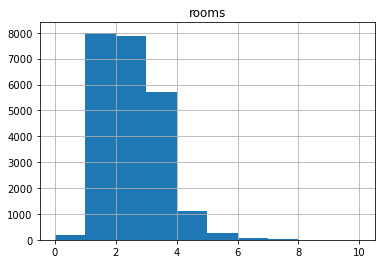

In [24]:
print(df['rooms'].describe())
df.hist('rooms',range = (0, 10), bins = 10)

Most often there are two and three-room apartments. Starting with four-room apartments, there has been a strong offer declines for sale. There is also a strange minimum limit value, the apartment cannot have 0 rooms. Let's study the data

In [25]:
df.query('rooms == 0')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_per_m2,day,month,year,living_to_total,kitchen_to_total,floor_type
144,2450.0,27.00,2017-03-30,0,NaN,24.0,15.500000,2,True,NaN,Murino setlement,NaN,181.0,90,3,3,2017,0.574074,NaN,Other
347,2320.0,25.00,2017-09-27,0,NaN,14.0,17.000000,1,False,NaN,Kudrovo village,NaN,45.0,92,2,9,2017,0.680000,NaN,Ground floor
438,2480.0,27.11,2018-03-12,0,NaN,17.0,24.750000,4,True,NaN,Sankt-Peterburg,15015.0,64.0,91,0,3,2018,0.912947,NaN,Other
505,3375.0,34.40,2017-03-28,0,NaN,26.0,24.300000,19,False,NaN,Pargolovo setlement,19292.0,430.0,98,1,3,2017,0.706395,NaN,Other
605,1850.0,25.00,2019-02-20,0,NaN,10.0,14.123429,7,True,NaN,Shushary setlement,NaN,29.0,74,2,2,2019,0.564937,NaN,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23079,3200.0,26.00,2017-09-01,0,NaN,25.0,18.000000,16,True,NaN,Sankt-Peterburg,13222.0,14.0,123,4,9,2017,0.692308,NaN,Other
23310,2500.0,27.70,2017-09-28,0,NaN,24.0,18.000000,4,False,NaN,Murino setlement,NaN,4.0,90,3,9,2017,0.649819,NaN,Other
23422,3350.0,26.00,2018-09-07,0,NaN,19.0,14.688367,8,True,NaN,Sankt-Peterburg,17092.0,31.0,128,4,9,2018,0.564937,NaN,Other
23459,1450.0,29.00,2017-11-11,0,NaN,9.0,18.000000,8,False,NaN,Nikol'skoe,NaN,82.0,50,5,11,2017,0.620690,NaN,Other


Zero rooms in those rows where the `studio` values are `True` can still be explained, most likely it means one single room combined with a kitchen. However, the remaining zeros are difficult to explain. Let's get rid of them.

In [26]:
df = df.query('~(rooms == 0 and studio == True)')
df.loc[df['rooms'] == 0] = 1
df = df.drop(columns = 'studio')
df['rooms'].describe()

count    23106.000000
mean         2.043192
std          0.978516
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

Now let's look at the room statistics in the entire sample.

In [27]:
df['rooms'].value_counts()

1     8060
2     7885
3     5718
4     1106
5      254
6       59
7       20
11       2
8        2
Name: rooms, dtype: int64

It seems that every apartment that has more than 7 rooms is an exception. Let's get rid of them.

In [28]:
df = df.query('rooms < 8')
df['rooms'].describe()

count    23102.000000
mean         2.041901
std          0.973468
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

Now, let's look at `ceiling_height`

count    14245.000000
mean         2.753224
std          1.257016
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

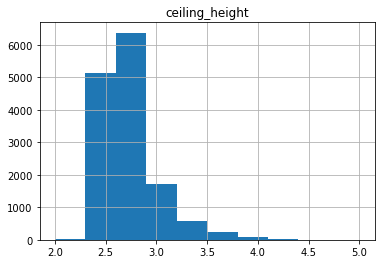

In [29]:
print(df['ceiling_height'].describe())
df.hist('ceiling_height', range = (2, 5), bins = 10)

A strange value of 100 meters ceiling heught immediately attracts attention. It is unlikely that there is a 5 or 4 storey apartment, it is rather a house, not an apartment. Let's study the data with apartments whose ceilings are higher than 10 meters.

In [30]:
df.query('ceiling_height > 10')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_per_m2,day,month,year,living_to_total,kitchen_to_total,floor_type
353,3600.0,55.2,2018-07-12 00:00:00,2,25.0,5.0,32.0,2,NaN,Gatchina,NaN,259.0,65,3,7,2018,0.579710,NaN,Other
3134,2900.0,75.0,2018-11-12 00:00:00,3,32.0,3.0,53.0,2,8.0,Volhov,NaN,NaN,38,0,11,2018,0.706667,0.106667,Other
4621,4300.0,45.0,2018-02-01 00:00:00,2,25.0,9.0,30.0,2,7.0,Sankt-Peterburg,13256.0,181.0,95,3,2,2018,0.666667,0.155556,Other
5051,3850.0,30.5,2018-10-03 00:00:00,1,24.0,5.0,19.5,1,5.5,Sankt-Peterburg,8389.0,7.0,126,2,10,2018,0.639344,0.180328,Ground floor
5219,2500.0,54.0,2017-10-13 00:00:00,2,27.0,5.0,30.0,3,9.0,Miny village,NaN,540.0,46,4,10,2017,0.555556,0.166667,Other
5641,4400.0,50.0,2017-08-08 00:00:00,2,26.0,9.0,21.3,3,7.0,Sankt-Peterburg,10912.0,267.0,88,1,8,2017,0.426000,0.140000,Other
5777,8150.0,80.0,2019-01-09 00:00:00,2,27.0,36.0,41.0,13,12.0,Sankt-Peterburg,20444.0,38.0,101,2,1,2019,0.512500,0.150000,Other
6213,3300.0,44.4,2019-03-25 00:00:00,2,25.0,5.0,31.3,5,5.7,Kronshtadt,50649.0,NaN,74,0,3,2019,0.704955,0.128378,Last floor
9334,3950.0,42.0,2017-03-26 00:00:00,3,25.0,5.0,30.0,2,5.2,Sankt-Peterburg,13581.0,NaN,94,6,3,2017,0.714286,0.123810,Other
10713,3800.0,58.0,2017-10-13 00:00:00,2,27.0,10.0,30.1,3,8.1,Murino setlement,NaN,71.0,65,4,10,2017,0.518966,0.139655,Other


Obviously there is a data error. A number of apartments are located in small towns and villages, while they have ceiling height values from 22 to 32 meters. Most likely, it meant to be not 22 and 32, but 2.2 and 3.2 meters. Let's fix this error and remove the anomalous 100 meters ceiling apartment away.

In [31]:
df = df.drop(df[df['ceiling_height'] == 100].index)
df.loc[df['ceiling_height'] > 10, 'ceiling_height'] = df['ceiling_height'] / 10
df['ceiling_height'].describe()

count    14244.000000
mean         2.710230
std          0.297501
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max          8.300000
Name: ceiling_height, dtype: float64

Now let's look at apartments with a ceiling height of less than 2 meters

In [32]:
df.query('ceiling_height < 2')['ceiling_height'].describe()

count    63.000000
mean      1.021905
std       0.108744
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.750000
Name: ceiling_height, dtype: float64

Such data is difficult to explain logically. Let's get rid of them.

In [33]:
df = df.drop(df.query('ceiling_height < 2').index)
df['ceiling_height'].describe()

count    14181.000000
mean         2.717731
std          0.275913
min          2.000000
25%          2.500000
50%          2.650000
75%          2.800000
max          8.300000
Name: ceiling_height, dtype: float64

Now the data is in perfect order. The average ceiling height is 2.7 meters, the range of values is from 2 meters to 8.3 meters, the latter is most likely a two or three-story apartment.

Let's examin the `days_exposition` data

count    19958.000000
mean       179.684287
std        218.290098
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

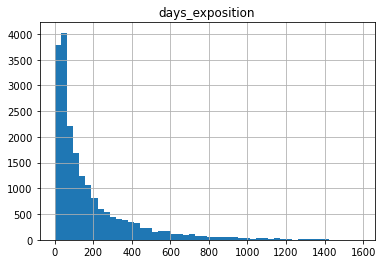

In [34]:
df.hist('days_exposition', bins = 50)
df['days_exposition'].describe()

The mean is almost twice the median. The data is extremely heterogeneous, the same can be seen from the plot. Judging by the quantile values, most often apartments are sold from 45 to 240 days, that is, from 1.5 to 8 months. Let's study the data on locations, for settlements with anomalous indicators.

In [36]:
df_locations = df[['locality_name', 'days_exposition']].copy()
df_locations['too_fast'] = df_locations['days_exposition'] < 45
df_locations['too_slow'] = df_locations['days_exposition'] > 240

too_fast = pd.pivot_table(df_locations, index='locality_name', values='too_fast')
bad_names_fast = too_fast.query('too_fast > 0.5')
bad_names_fast

too_slow = pd.pivot_table(df_locations, index='locality_name', values='too_slow')
bad_names_slow = too_slow.query('too_slow > 0.5')

bad_names = list(bad_names_slow.index) + list(bad_names_fast.index)

df.query('locality_name in @bad_names')['days_exposition'].describe()

count     112.000000
mean      259.160714
std       256.416804
min         3.000000
25%        18.750000
50%       247.000000
75%       414.500000
max      1069.000000
Name: days_exposition, dtype: float64

Only 112 rows with rare locations, which are more than 50%  consists of outliers. Let's get rid of them.

In [38]:
df = df.query('locality_name not in @bad_names')
df.query('locality_name in @bad_names')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_per_m2,day,month,year,living_to_total,kitchen_to_total,floor_type


#### Conclusion

To get rid of the outliers, the following actions were taken:
- The price range was determined from 430 thousand to 40 million rubles per apartment
- Area from 12 to 200 m2
- Number of rooms from 1 to 7
- Ceiling height from 2 to 8.3 meters
- Removed 112 rows with obvious anomalies in the time of the sale of the apartment

### Indicators research

#### Price

count    22921.000000
mean      5825.937451
std       4310.016481
min        430.000000
25%       3450.000000
50%       4610.000000
75%       6700.000000
max      39990.000000
Name: last_price, dtype: float64

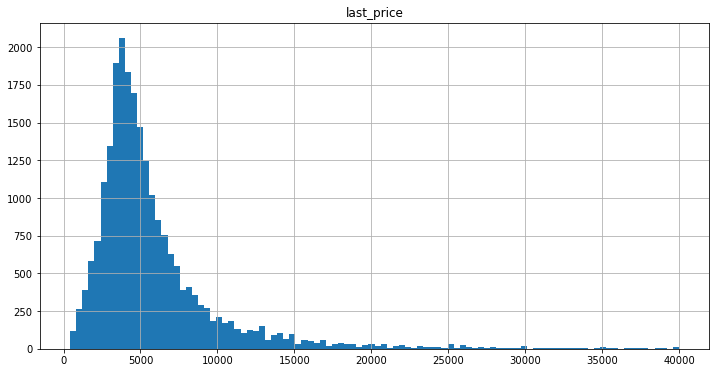

In [39]:
df.hist('last_price', bins = 100, figsize = (12, 6))
df['last_price'].describe()

#### Area

count    22921.000000
mean        58.029096
std         25.724773
min         12.000000
25%         40.000000
50%         52.000000
75%         68.700000
max        199.200000
Name: total_area, dtype: float64

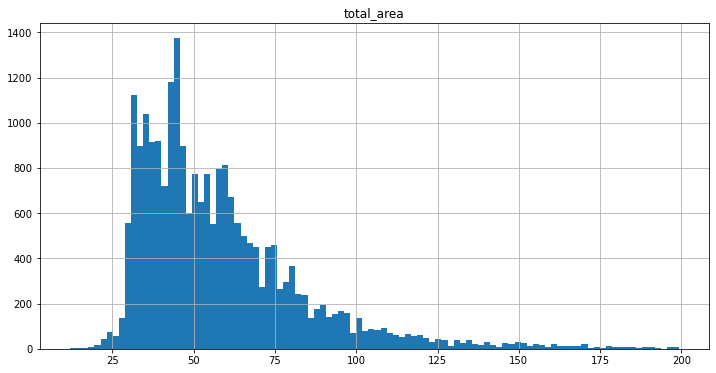

In [40]:
df.hist('total_area', bins = 100, figsize = (12, 6))
df['total_area'].describe()

#### Rooms

count    22921.000000
mean         2.045417
std          0.974181
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

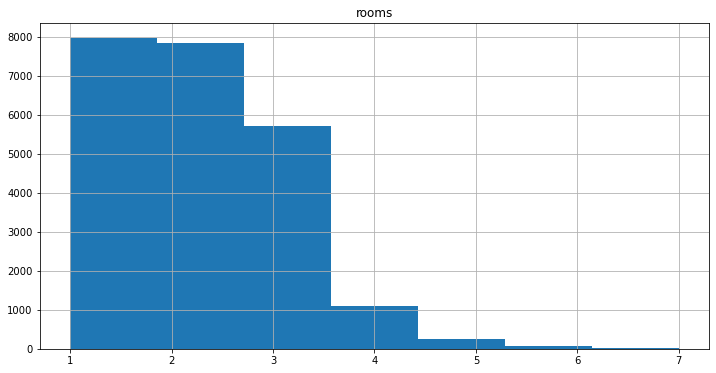

In [41]:
df.hist('rooms', bins = 7, figsize = (12, 6))
df['rooms'].describe()

#### Ceiling height

count    14119.000000
mean         2.718239
std          0.276210
min          2.000000
25%          2.500000
50%          2.650000
75%          2.800000
max          8.300000
Name: ceiling_height, dtype: float64

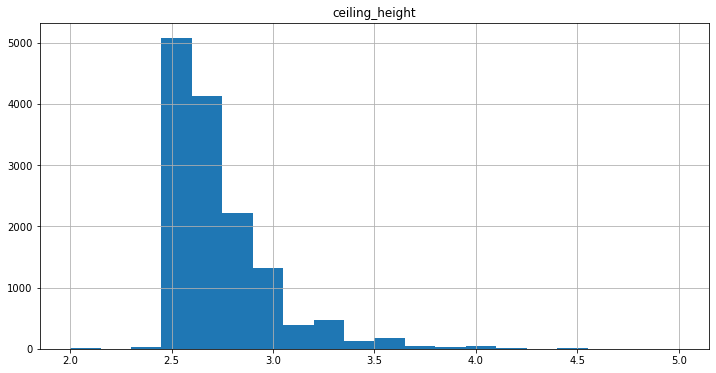

In [42]:
df.hist('ceiling_height', range = (2, 5), bins = 20, figsize = (12, 6))
df['ceiling_height'].describe()

#### Conclusion

The following parameters are defined:

**Price**

- Most of the apartments are sold in the range from 3.5 to 6.7 million rubles
- Average price for the sample - 4.6 million
- Median price for the sample - 5.8 million

**Total area**

- Most of the apartments have an area of 40 to 70 m2
- Average area - 52 m2
- Median area - 58 m2

**Number of rooms**

- The vast majority of apartments have from 1 to 3 rooms

**Ceiling height**

- The vast majority of apartments have a ceiling height of 2.5 to 2.8 meters

### The study of price influencing factors

It is required to determine the influence of the total area, number of rooms, distance from the center, type of floor, day, month and year of the advertisement factors on the price. Let's build scatterplots for the indicators of area and distance from the center.

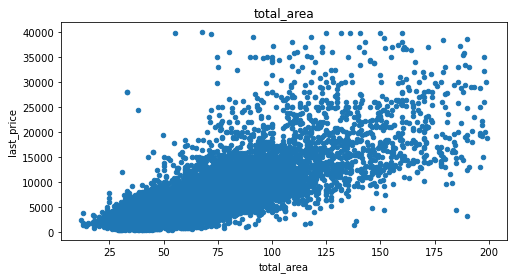

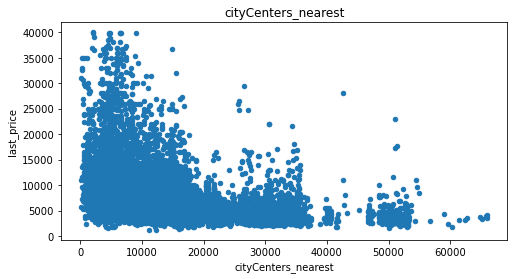

In [43]:
for_scatter = ['total_area','cityCenters_nearest']

for name in for_scatter:
    df.plot(x = name, y = 'last_price', kind = 'scatter', title = name, figsize = (8, 4))

Up to 75m2 there is a clear high price-area correlation. Further, the spread becomes larger, but the general trend is obvious - the larger the area, the higher the price.

We see the dependence of the price on the distance to the center in the range from 0 to 20 km. Further there are two peaks at 30 km and 50 km. Most likely, the distance to the center is measured from the center of St. Petersburg, and not the center of each of the cities and settlements of the district. So far, it can be unequivocally stated that apartments from 0 to 10 km from the center are much more expensive than others.

Now let's build bar charts for the indicators of the year, month, day of the week, number of rooms and floor for the average apartment price.

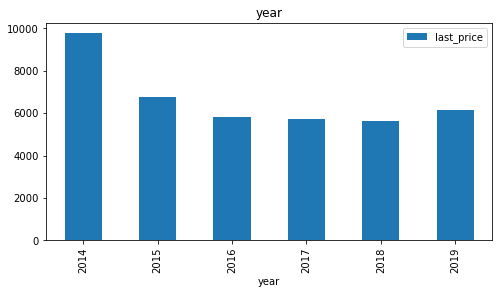

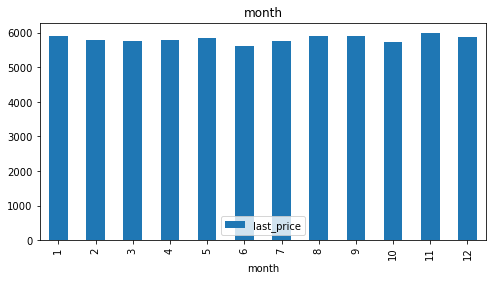

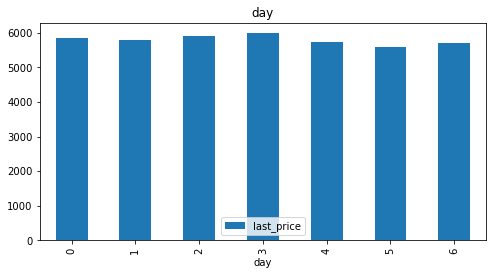

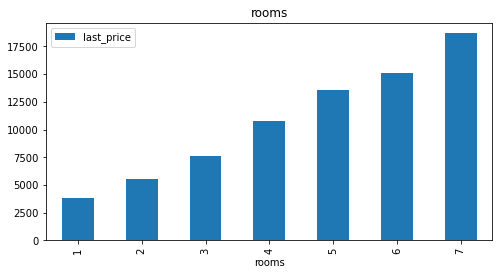

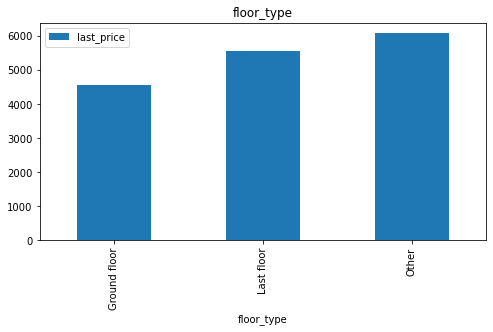

In [44]:
for_bar = ['year','month', 'day', 'rooms', 'floor_type']

for name in for_bar:
    df.pivot_table(index = name, values = 'last_price', aggfunc = 'mean').plot(kind = 'bar', title = name, figsize = (8, 4))

From 2014, when the highest average price per quarter was observed, to 2016, there was a decrease, after which the price stabilized and showed a slight increase in 2019 relative to 2018. The price dependence on the day of the week and month is almost not expressed. Apartments, exhibited in June and October are sold slightly cheaper, as well as those that were exhibited on Friday, Saturday and Sunday.

The behavior of the data of the floor type indicator gives us a clear picture - the most expensive on average are apartments located not on the first and not on the top floor, slightly cheaper apartments located on the top floor and much cheaper than those located on the first floor.

#### Conclusion

- The vast majority of apartments have a hight correlation between the price and the total area. It decrease after 75 m2
- Apartments up to 10 km from the center are much more expensive than others. Most likely apartments are categorized on those thar are in the center and others. This will be tested in the next study.
- Apartments exhibited in 2014 are much more expensive than those that are exposed later. Further, there is no dependence of the price on the ads exposition year 
- A direct dependence of the price on the number of rooms was found
- Apartments located on the ground floor are cheaper than apartments located on other floors
- The dependence of the price on the ads month and day of the week the was not detected

### Top-10 cities research

It is required to compile a rating of 10 cities with the largest number of ads and analyze the cost per square meter for it. Let's make a pivot table for the research

In [45]:
df_top10 = df.pivot_table(index = 'locality_name', values = 'price_per_m2', aggfunc = ['count', 'mean'])
df_top10.columns = ['offers', 'mean_price_m2']
df_top10 = df_top10.sort_values(by = 'offers', ascending = False).head(10)
df_top10

,offers,mean_price_m2
locality_name,,
Sankt-Peterburg,15225,111.077110
Murino setlement,494,84.566802
Shushary setlement,435,77.777011
Vsevolozhsk,392,68.142857
Pushkin,364,102.651099
Kolpino,337,74.860534
Pargolovo setlement,322,90.006211
Gatchina,307,68.263844
Kudrovo village,283,91.802120


Sort the data by cost per square meter.

In [46]:
df_top10 = df_top10.sort_values(by = 'mean_price_m2', ascending = False)
df_top10

,offers,mean_price_m2
locality_name,,
Sankt-Peterburg,15225,111.077110
Pushkin,364,102.651099
Kudrovo village,283,91.802120
Pargolovo setlement,322,90.006211
Murino setlement,494,84.566802
Shushary setlement,435,77.777011
Kolpino,337,74.860534
Gatchina,307,68.263844
Vsevolozhsk,392,68.142857


We add a metric showing how much each city following the leader in terms of price differs from the first one.

In [47]:
df_top10['ratio%'] = (1 - (df_top10['mean_price_m2'] / df_top10['mean_price_m2'][0]))*100
df_top10

,offers,mean_price_m2,ratio%
locality_name,,,
Sankt-Peterburg,15225,111.077110,0.000000
Pushkin,364,102.651099,7.585731
Kudrovo village,283,91.802120,17.352801
Pargolovo setlement,322,90.006211,18.969614
Murino setlement,494,84.566802,23.866581
Shushary setlement,435,77.777011,29.979263
Kolpino,337,74.860534,32.604896
Gatchina,307,68.263844,38.543734
Vsevolozhsk,392,68.142857,38.652656


The most expensive city, as expected, is St. Petersburg. The raiting middle city is cheaper than the leader by about 25%, the cheapest Top-10 city is Vyborg, where apartments are almost two times cheaper than in St. Petersburg.

#### Conclusion

- Most apartments were found in St. Petersburg, the price per square meter is the most expensive  - 110 thousand per m2
- Least of apartments from the top-10 rating was found in Vyborg, the price per square meter is also the cheapest - 58 thousand per square meter. It is almost two times cheaper than in St. Petersburg

### St. Petersburg city center research

#### Data Sample

In order to analyze the St. Petersburg city center, we need to determine where it is located. Also, remember that when handling gaps, it was suggested that the empty values in the `cityCenters_nearest` column probably indicate the apartments in the very center. Let's create a table for further analysis. 

In [48]:
df_spb = df.query('locality_name == "Sankt-Peterburg"').copy()
df_spb['city_center_km'] = df_spb['cityCenters_nearest'] / 1000
df_spb['city_center_km'] = df_spb['city_center_km'].fillna(0).astype('int')
df_spb.head(5)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,cityCenters_nearest,days_exposition,price_per_m2,day,month,year,living_to_total,kitchen_to_total,floor_type,city_center_km
0,13000.0,108.0,2019-03-07 00:00:00,3,2.70,16.0,51.000000,8,25.0,Sankt-Peterburg,16028.0,NaN,120,3,3,2019,0.472222,0.231481,Other,16
2,5196.0,56.0,2015-08-20 00:00:00,2,NaN,5.0,34.300000,4,8.3,Sankt-Peterburg,13933.0,558.0,92,3,8,2015,0.612500,0.148214,Other,13
4,10000.0,100.0,2018-06-19 00:00:00,2,3.03,14.0,32.000000,13,41.0,Sankt-Peterburg,8098.0,121.0,100,1,6,2018,0.320000,0.410000,Other,8
7,7915.0,71.6,2019-04-18 00:00:00,2,NaN,24.0,40.449502,22,18.9,Sankt-Peterburg,11634.0,NaN,110,3,4,2019,0.564937,0.263966,Other,11
9,5400.0,61.0,2017-02-26 00:00:00,3,2.50,9.0,43.600000,7,6.5,Sankt-Peterburg,15008.0,289.0,88,6,2,2017,0.714754,0.106557,Other,15


In [49]:
df_spb_km_price = df_spb.pivot_table(index = 'city_center_km', values = 'last_price', aggfunc = 'mean')
df_spb_km_price.head(5)

,last_price
city_center_km,
0,12613.126331
1,11529.780369
2,10638.360727
3,10162.895942
4,11326.622346


Apartments with an empty `cityCenter_nearest` value are still the most expensive and statistically relevant. It looks like the hypothesis was correct, let's leave the data as it is. Now let's build a avarage price per km plot

<AxesSubplot:title={'center':'Average price per kilometer'}, xlabel='city_center_km'>

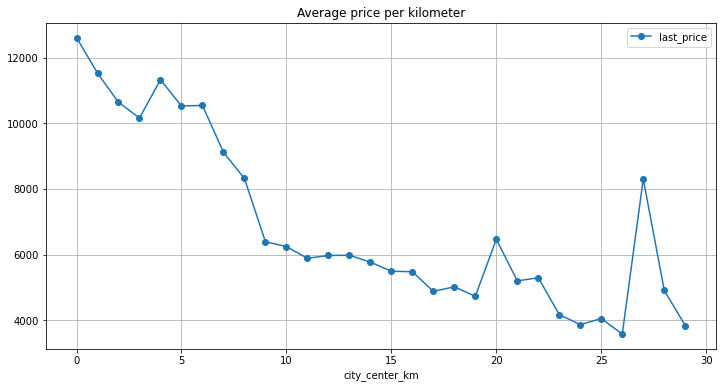

In [50]:
df_spb_km_price.plot(figsize = (12, 6), grid = True, style = 'o-', title = 'Average price per kilometer')

An interesting price surge around the 27th kilometer, but it is not our interest for now. It seems that we can clearly define apartments in the center, these are apartments in the 0 - 6 km inclusive city center range. Let's create a sample with apartments in the center of St. Petersburg and study it.

In [51]:
df_spb_center = df_spb.query('city_center_km <= 6').copy()
df_spb_center.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3089 entries, 24 to 23560
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            3089 non-null   float64
 1   total_area            3089 non-null   float64
 2   first_day_exposition  3089 non-null   object 
 3   rooms                 3089 non-null   int64  
 4   ceiling_height        2011 non-null   float64
 5   floors_total          3089 non-null   float64
 6   living_area           3089 non-null   float64
 7   floor                 3089 non-null   int64  
 8   kitchen_area          2807 non-null   float64
 9   locality_name         3089 non-null   object 
 10  cityCenters_nearest   3034 non-null   float64
 11  days_exposition       2559 non-null   float64
 12  price_per_m2          3089 non-null   int32  
 13  day                   3089 non-null   int64  
 14  month                 3089 non-null   int64  
 15  year               

#### Parameters research

Let's start by examining the parameters of area, price, number of rooms and ceiling height. Let us repeat the same methods that we used in the parameter analysis for the entire sample.

count     3089.000000
mean     10855.813906
std       6607.980136
min       1600.000000
25%       6550.000000
50%       8850.000000
75%      12900.000000
max      39990.000000
Name: last_price, dtype: float64

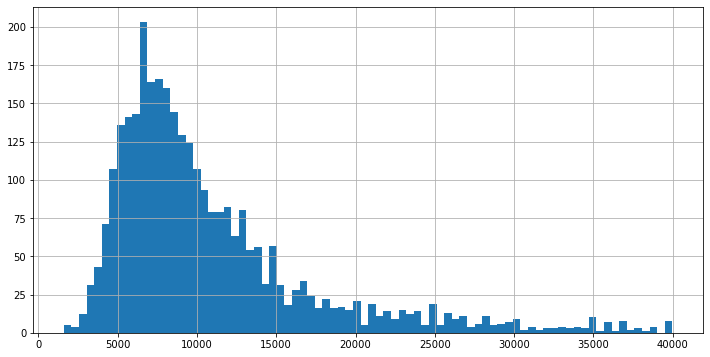

In [52]:
df_spb_center['last_price'].hist(bins = 80, figsize = (12, 6))
df_spb_center['last_price'].describe()

The picture is similar to the one we got when studying the price for the entire sample, only the price level is higher. The average price in the center is 8.8 million versus 4.6 million for the entire sample. The median value differs the same, 10.8 million in the center versus 5.8 million for the entire sample. It can be unequivocally concluded that apartments in the center are almost twice as expensive as apartments in the general sample.

count    3089.000000
mean       82.224535
std        35.291760
min        12.000000
25%        56.000000
50%        75.500000
75%       101.900000
max       198.000000
Name: total_area, dtype: float64

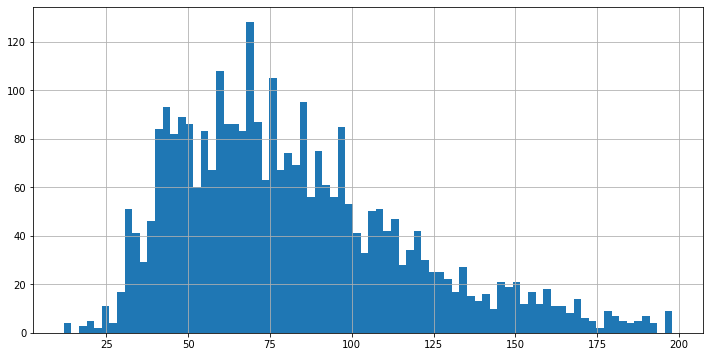

In [53]:
df_spb_center['total_area'].hist(bins = 80, figsize = (12, 6))
df_spb_center['total_area'].describe()

The difference between the mean and median is approximately equal to the same difference for the entire sample, but the parameter lavel hase grown. 75 m2 median versus 51 m2 for the entire sample and 82 m2 for the mean versus 57 m2 for the entire sample. Apartments in the center are also almost twice the size of apartments in the entire sample.

count    3089.000000
mean        2.678860
std         1.197665
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         7.000000
Name: rooms, dtype: float64

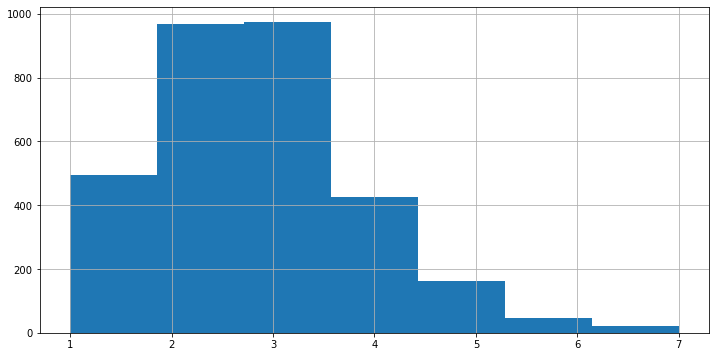

In [54]:
df_spb_center['rooms'].hist(bins = 7, figsize = (12, 6))
df_spb_center['rooms'].describe()

If for the entire sample two room apartments are more common, for the center three room apartments can be found more often.  No wonder why they are more expensive.

count    2011.000000
mean        3.079622
std         0.345871
min         2.400000
25%         2.820000
50%         3.000000
75%         3.250000
max         5.500000
Name: ceiling_height, dtype: float64

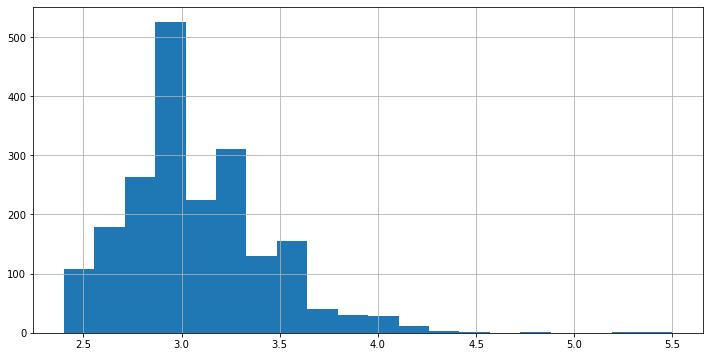

In [55]:
df_spb_center['ceiling_height'].hist(bins = 20, figsize = (12, 6))
df_spb_center['ceiling_height'].describe()

The ceilings in the center also turned out to be higher, 3 meters on average versus 2.7 meters for the entire sample.

#### Factors research

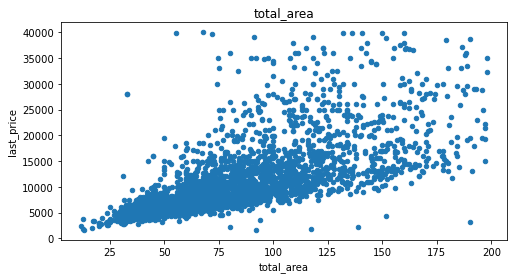

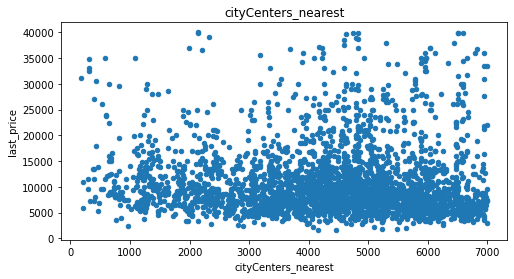

In [56]:
for_scatter = ['total_area','cityCenters_nearest']

for name in for_scatter:
    df_spb_center.plot(x = name, y = 'last_price', kind = 'scatter', title = name, figsize = (8, 4))

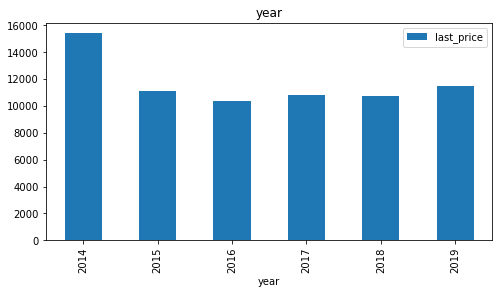

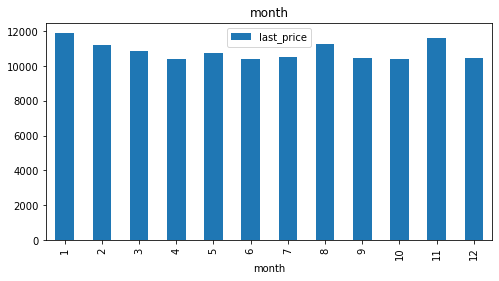

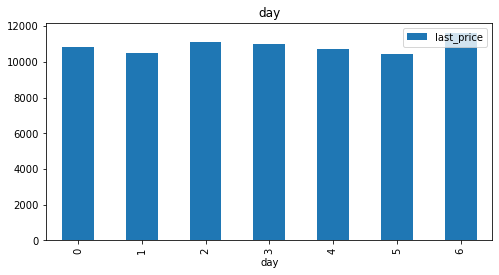

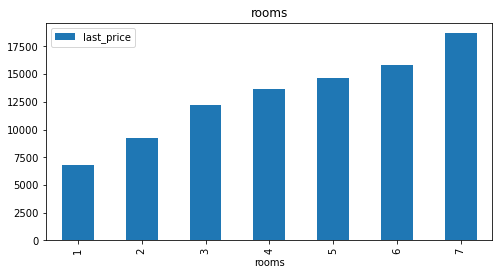

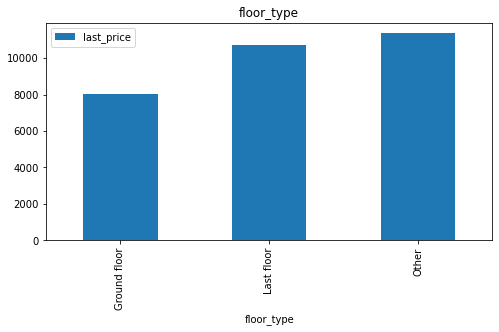

In [57]:
for_bar = ['year','month', 'day', 'rooms', 'floor_type']

for name in for_bar:
    df_spb_center.pivot_table(index = name, values = 'last_price', aggfunc = 'mean').plot(kind = 'bar', title = name, figsize = (8, 4))

#### Conclusion

The center of St. Petersburg is in the range from 0 to 6 km

**Parameters**

- The average apartment price in the St. Petersburg city center is almost twice as high as the average price for the entire sample - 8.8 million versus 4.6 million
- The average area is also almost twice as big, 82 m2 in the center versus 52 m2 in the entire sample
- Most of the apartments contain 3 rooms, against a range of 1 to 3 rooms throughout the sample
- Ceilings are higher in the center - an average of 3 meters versus 2.7 for the entire sample

**Trends**

Trends that do not change depending on the sample:
- The larger the area, the higher the price. Dependence weakens after 75 m2
- The more rooms, the higher the price
- Apartments on the ground floor is cheaper than others. Apartments on the last floor are slightly cheaper than not ground and not last floor appartments
- After 2014, there is a drop in the apartment average price 
- There is no pronounced dependence of price on the ad placement day of the week and month

## Research results

The following parameters were determined for the entire sample:

**Price**

- Most of the apartments are sold in the range from 3.5 to 6.7 million rubles
- Average price for the sample - 4.6 million
- Median price for the sample - 5.8 million

**Total area**

- Most of the apartments have an area from 40 to 70 m2
- Average area - 52 m2
- Median area - 58 m2

**Number of rooms**

- The vast majority of apartments have from 1 to 3 rooms

**Ceiling height**

- The vast majority of apartments have a ceiling height of 2.5 to 2.8 meters

**Influence on price**

- The vast majority of apartments have a direct correlation between the price of the total area. Dependence becomes less obvious after 75 m2
- Apartments up to 10 km from the center are much more expensive than others. Most likely apartments in terms of price are divided into those thar are in the center and others.
- Apartments exposed in 2014 are much more expensive than those that are exposed later. Further, there is no pronounced dependence of the price on the year
- A direct correlation of the price on the number of rooms was found
- Apartments located on the ground floor are cheaper than apartments located on other floors
- The dependence of the price on the ads month and day of the week was not detected

**Top 10 cities reserch**

- Most apartments were found in St. Petersburg, the price per square meter is the most expensive - 110 thousand per m2
- Least of apartments from the top-10 rating was found in Vyborg, the price per square meter is also the cheapest - 58 thousand per square meter. It is almost two times cheaper than in St. Petersburg

**St. Petersburg city center reserch**
- The average price of an apartment in the center of St. Petersburg is almost twice as high as the average price for the entire sample - 8.8 million versus 4.6 million
- The average area is also almost twice as high, 82 m2 in the center versus 52 m2 in the entire sample
- Most of the apartments contain 3 rooms, against a range of 1 to 3 rooms throughout the sample
- Ceilings are higher in the center - an average of 3 meters versus 2.7 for the entire sample